In [39]:
###import the package we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [40]:
##set up alphas
alphas = 10**np.linspace(10,-2,100)*0.5

In [41]:
##load data
dat=pd.read_csv('/Users/jiaqitang/Downloads/Hitters.csv')
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [42]:
##filter the data for prediction and remove n/a
dat=dat[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors','Salary']]
dat=dat.dropna()

In [43]:
##get target and features
Y=dat.Salary
X=dat.drop('Salary',axis=1)

In [44]:
##normalized the data
X=preprocessing.normalize(X)



In [45]:
xlabs=['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors','Salary']

1.1
Use LASSO regression to predict Salary from the other numeric predictors.Create a visualization of the coefficient trajectories. 
Comment on which are the final three predictors that remain in the model. 

Use cross-validation to find the optimal value of the regularization penality. 
How many predictors are left in that model?


In [57]:
##use lasso
lasso = Lasso(max_iter = 10000)
coefs = []
i=0
for a in alphas:
    
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)
    i=i+1
   # if(len(lasso.coef_[lasso.coef_ !=0.0])==3):
     #      break


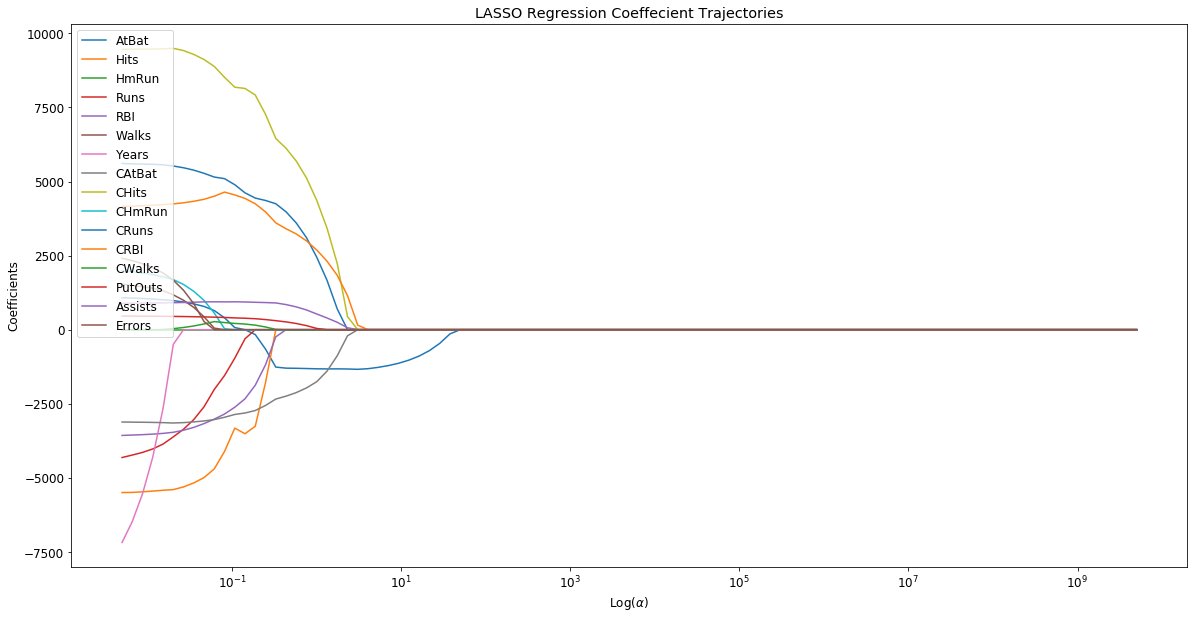

from this graph, we can tell the last three predictors are Hits, CRuns, and CRBI.


In [59]:
ax = plt.gca()

for a in range(np.array(coefs).shape[1]):
    plt.plot(alphas, np.array(coefs)[:,a], label=xlabs[a])

ax.set_xlim(ax.get_xlim()[::1])
ax.set_xscale('log')
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("LASSO Regression Coeffecient Trajectories")
plt.axis('tight')
plt.xlabel('Log($\\alpha$)')
plt.ylabel('Coefficients')
plt.legend()
plt.show()
print("from this graph, we can tell the last three predictors are Hits, CRuns, and CRBI.")

In [60]:
##Use cross-validation to find the optimal value of the regularization penality. 
from sklearn.metrics import mean_squared_error
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(X, Y)
print("the optimal alpha is  ", lassocv.alpha_)
lasso.set_params(alpha=lassocv.alpha_)


the optimal alpha is   0.14240179342179024


Lasso(alpha=0.14240179342179024, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

from the graph, the number of  predictors that remain in the model is 10, and they are. : ['Hits', 'Runs', 'RBI', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists']


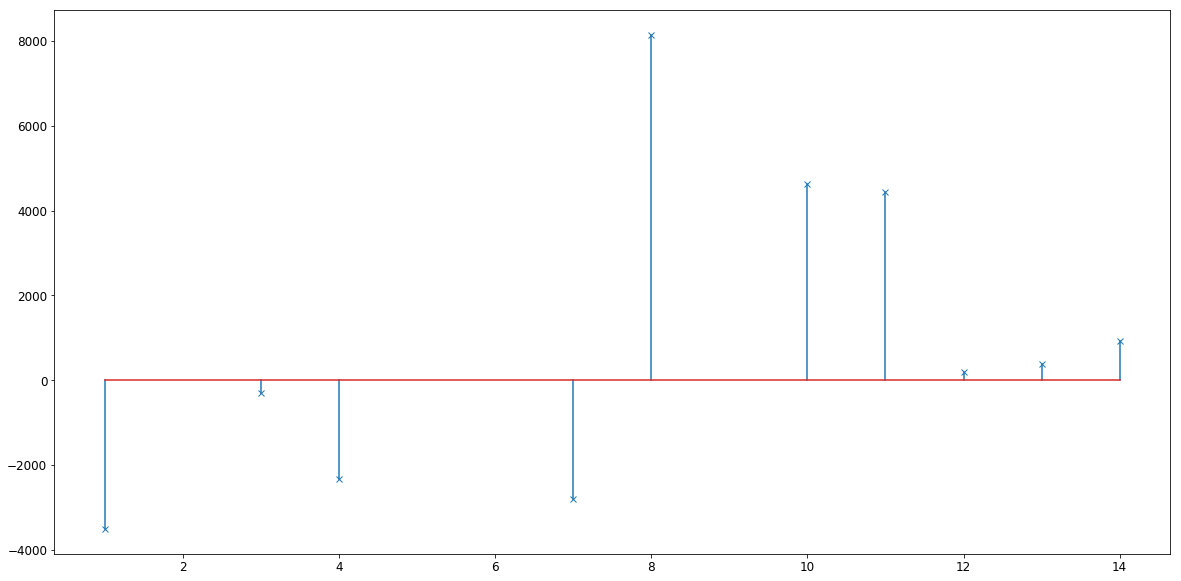

In [69]:
##visulize the results from cv
m, s, _ = plt.stem(np.where(lassocv.coef_)[0], lassocv.coef_[lassocv.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
features_name=[xlabs[i] for i in np.where(lassocv.coef_)[0]]
print("from the graph, the number of  predictors that remain in the model is 10, and they are. :", features_name)

In [63]:
## ridge

ridge = Ridge(max_iter = 10000)
#ridge.fit(X_train,y_train)
i=0
coefsrid=[]
for a in alphas:
    
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefsrid.append(ridge.coef_)
    i=i+1
 


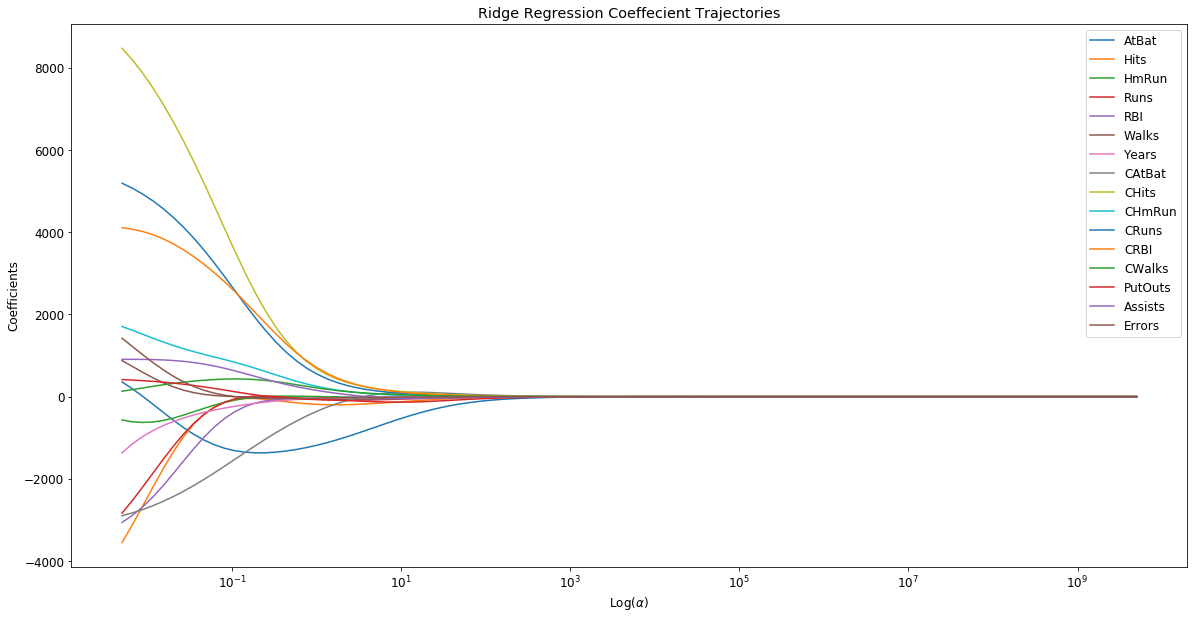

In [64]:
ax = plt.gca()

for a in range(np.array(coefsrid).shape[1]):
    plt.plot(alphas, np.array(coefsrid)[:,a], label=xlabs[a])

ax.set_xlim(ax.get_xlim()[::1])
ax.set_xscale('log')
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Ridge Regression Coeffecient Trajectories")
plt.axis('tight')
plt.xlabel('Log($\\alpha$)')
plt.ylabel('Coefficients')
plt.legend()
plt.show()

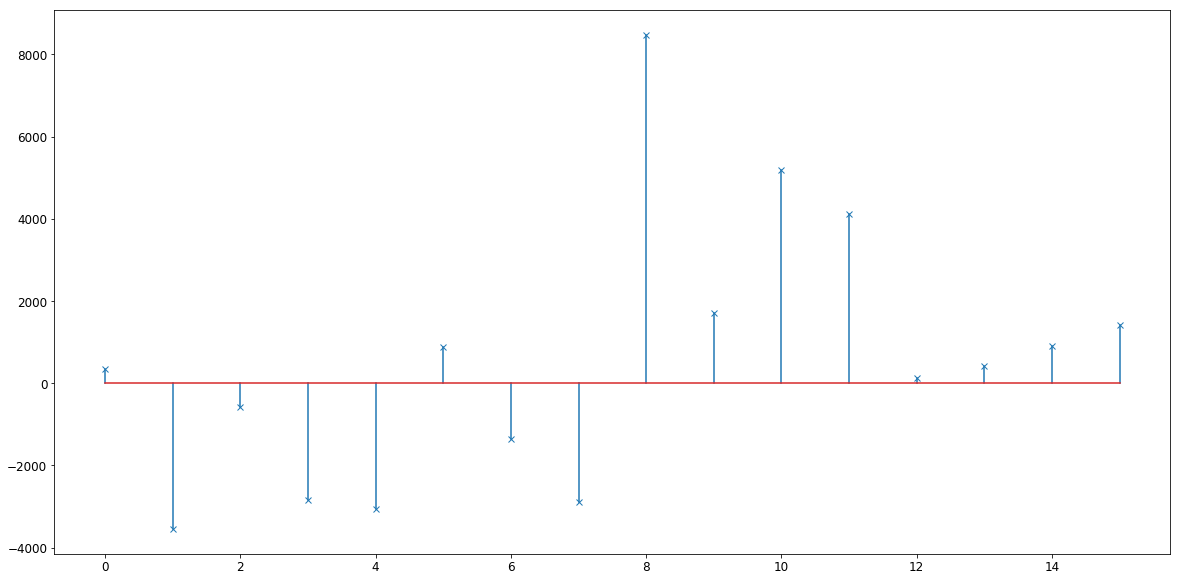

In [65]:
###visualization of the coefficient trajectories of ridge
m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0],
                   markerfmt='x', label='ridge coefficients')

In [66]:
####Use cross-validation to find the optimal value of the regularization penality for ridge
ridgecv = RidgeCV(alphas = alphas)

ridgecv.fit(X,Y)
print("the optimal alpha is  ", ridgecv.alpha_)
print ("for ridge , all predictors are here")


the optimal alpha is   0.006609705742330144


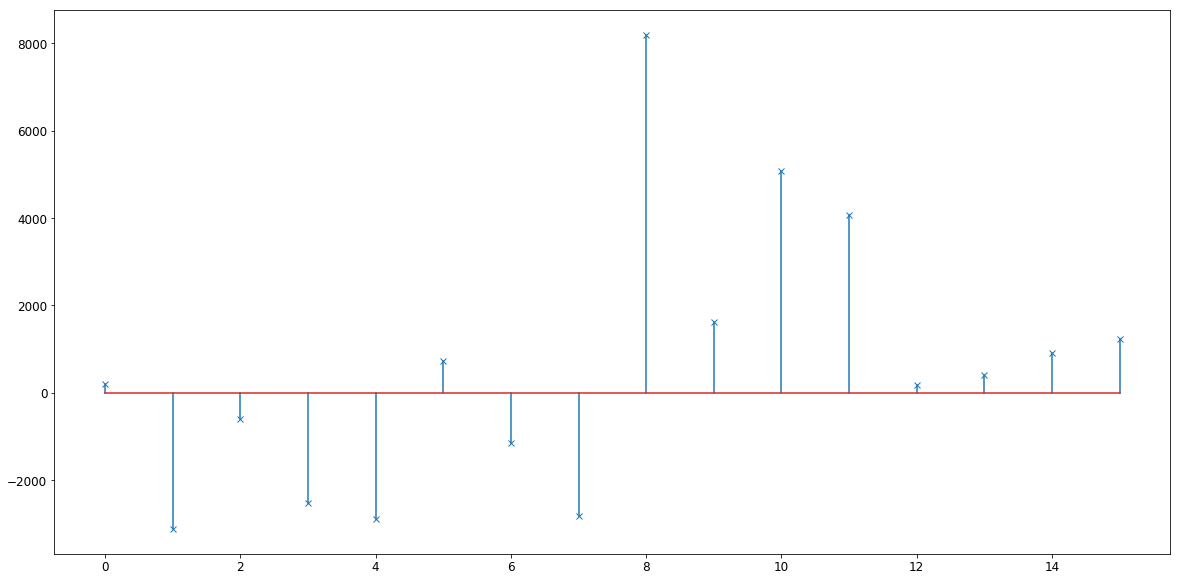

In [67]:
#####visualization of the coefficient trajectories of ridge with cv
m, s, _ = plt.stem(np.where(ridgecv.coef_)[0], ridgecv.coef_[ridgecv.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')

########2#########
##Short Answer. Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.

bias–variance tradeoff is that when we perform preditive models in statistics, the models with a lower bias have a higher variance, and vice versa.
Regularization plays a role for finding better model complexity for prediction. It uses the way that adding a penalty term to control the model complexity. 

from 1, we can tell both LASSO and Ridge Regression with higher bias and lower variance to reduce the complexity of regression model by adding penalty would reduce the complexity(feature selection),since the larger the alpha (penalty) is, the smaller the coeffecients are. Lasso cna have 0 coefficients that could be used for feature selection. However, ridge is a kind of shrinkage so that the coefficients would close to 0 but not exact 0.

